<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:green"><center>Conceptos básicos de regresión</center></span>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Archivos_Generales/Imagenes/Patrones.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>
<center>

Fuente: [Pexels: Iva Muškić](https://www.pexels.com/es-es/foto/textil-estampado-colmena-gris-y-negro-691710/)

</center>


## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com
5. Jessica López Mejía, jelopezme@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:#4361EE">Contenido</span>

- [Introducción](#Introducción)
- [Ejemplo: modelo lineal](#Ejemplo:-modelo-lineal)
- [Ejemplo: modelo cuadrático](#Ejemplo:-modelo-cuadrático)
- [Modelo polinomial general](#Modelo-polinomial-general)
- [Función de pérdida](#Función-de-pérdida)
- [Pérdida en entrenamiento vs pérdida en validación](#Pérdida-en-entrenamiento-vs-pérdida-en-validación)
- [Sobreajuste y otros problemas](#Sobreajuste-y-otros-problemas)
- [Regularización](#Regularización)
- [Regularización L2](#Regularización-L2)
- [Regularización L1](#Regularización-L1)
- [Regularización L1-L2](#Regularización-L1-L2)
- [Perspectiva probabilística](#Perspectiva-probabilística)
- [Distribución conjunta](#Distribución-conjunta)
- [Verosimilitud](#Verosimilitud)
- [Función de pérdida asociada a la log-verosimilitud](#Función-de-pérdida-asociada-a-la-log-verosimilitud)
- [Densidad condicional](#Densidad-condicional)
- [Regresión y máxima verosimilitud](#Regresión-y-máxima-verosimilitud)
- [Distribución predictiva](#Distribución-predictiva)

## <span style="color:#4361EE">Introducción</span>

En esta lección se introduce una de las máquinas de aprendizaje más conocidas. La máquina de regresión.

En el caso más simple de un problema de regresión, lo que se busca es establecer una relación entre dos variables aleatorias. 

## <span style="color:#4361EE">Ejemplo 1: Modelo lineal</span>

La gráfica presenta un conjunto de datos de entrenamiento de $ N = 11 $ puntos, que se muestran como círculos cafés, cada uno con una observación de la variable de entrada $ x $ junto con la variable objetivo correspondiente $ y $. 


Nuestro objetivo en este caso es entrenar una máquina de aprendizaje de tipo lineal, es decir, de la forma $y = ax+b$.


La curva azul muestra la función $y= 0.8431 x + 6.339$, la cual corresponde al modelo lineal entrenado para este conjunto de datos. El entrenamiento fue desarrollado usando la función *polyfit()* de numpy.

El área sombreada corresponde a lo que los estadísticos llaman bandas de confianza. No entraremos en detalles, pero se espera que la mayor parte de los datos de entrenamiento y validación queden dentro de tales bandas. Esta es una medida de la calidad de la máquina de aprendizaje. El gráfico muestra que las cosas no salieron muy bien. Esto es porque al parecer el comportamiento de los datos que no es lineal. 

Los datos de entrenamiento aparecen de color café y los datos de validación en color verde.


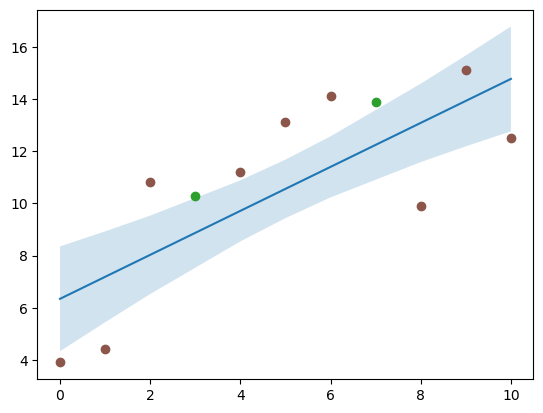

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.array([0,1,2,4,5,6,8,9,10])
x_val =  np.array([3,7])

y_train =  np.array([3.9, 4.4, 10.8,  11.2, 13.1, 14.1,  9.9,  15.1, 12.5])
y_val =  np.array([10.3, 13.9])

# Ajustar una curva lineal y estimar sus y-valores y su error.
a, b = np.polyfit(x_train, y_train, deg=1)
y_est = a * x_train + b
y_err = x_train.std() * np.sqrt(1/len(x_train) +
                          (x_train - x_train.mean())**2 / np.sum((x_train - x_train.mean())**2))

fig, ax = plt.subplots()
ax.plot(x_train, y_est, '-')
ax.fill_between(x_train, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x_train, y_train, 'o', color='tab:brown')
ax.plot(x_val, y_val, 'o', color='tab:green')

plt.show()

## <span style="color:#4361EE">Ejemplo 2: Modelo cuadrático</span> 


En este segundo intento vamos a entrenar un modelo  de tipo cuadrático de la forma $y = ax^2 + bx +c$.  Usaremos la misma herramienta para entrenar el modelo. La gráfica presenta el resultado.

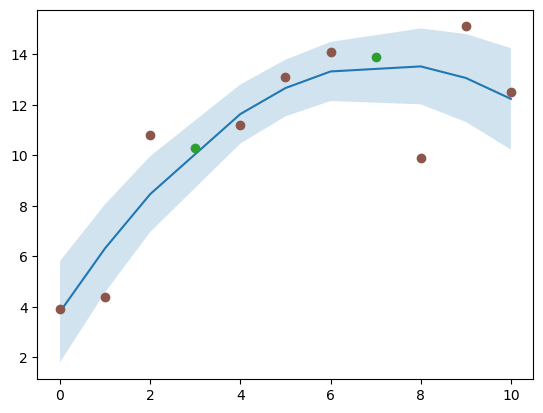

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.array([0,1,2,4,5,6,8,9,10])
x_val =  np.array([3,7])

y_train =  np.array([3.9, 4.4, 10.8,  11.2, 13.1, 14.1,  9.9,  15.1, 12.5])
y_val =  np.array([10.3, 13.9])


# Ajustar una curva lineal y estimar sus y-valores y su error.
a, b, c = np.polyfit(x_train, y_train, deg=2)
y_est = a * x_train**2 + b *x_train + c
y_err = x_train.std() * np.sqrt(1/len(x_train) +
                          (x_train - x_train.mean())**2 / np.sum((x_train - x_train.mean())**2))

fig, ax = plt.subplots()
ax.plot(x_train, y_est, '-')
ax.fill_between(x_train, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x_train, y_train, 'o', color='tab:brown')
ax.plot(x_val, y_val, 'o', color='tab:green')
#plt.savefig('predictive.png')
plt.show()

El modelo obtenido es $y = f(x) = -0.185x^2 + 2.701x + 3.8$. 

De acuerdo con las bandas de confianza este es un mejor modelo. En general existen herramientas para juzgar que tan buena es nuestra máquina de aprendizaje.

Los valores predichos por el modelo son los que caen sobre la curva. Observe como en este caso los datos de validación quedan bastante bien predichos.


## <span style="color:#4361EE">Ejemplo 3: Modelo polinomial general</span> 

Por el momento, procederemos de manera bastante informal y consideraremos un
enfoque simple basado en el ajuste de curvas. En particular, ajustaremos los datos utilizando una
función polinomial de la forma:

$$y = f(x,\boldsymbol{w}) = w_0 + w_1x + w_2x^2+ . . . + w_M x^M = \sum_{j=0}^M w_jx^j$$



## <span style="color:#4361EE">Función de pérdida</span>  


Los valores de los coeficientes se determinarán ajustando el polinomio a los datos de entrenamiento. Esto se puede hacer minimizando una función de pérdida que mide el desajuste entre la función $f(x,\boldsymbol{w})$, para cualquier valor de  $\boldsymbol{w}$, y el conjunto de datos de entrenamiento.

Una opción simple de función de pérdida, que se usa ampliamente, viene dada por el promedio de **los cuadrados de los errores** entre las predicciones $f(x_n,\boldsymbol{w})$, que denotaremos por $\tilde{y}_n$,  y los correspondientes valores objetivo $y_n$, de tal manera que se minimice:


$$ECM(w) = \frac{1}{N} \sum_{n=1}^{N} [{f(x_n,\boldsymbol{w}) − y_n}]^2 = \frac{1}{N} \sum_{n=1}^{N} [{\tilde{y}_n − y_n}]^2$$


## <span style="color:#4361EE">Pérdida en entrenamiento vs pérdida en validación</span> 

Los datos de validación se notarán respectivamente como $x_n^*$ y $y_n^*$. Los datos de entrenamiento no tienen ningún símbolo adicional.

Así, el ECM, es el modelo cuadrático para los datos de entrenamiento, luego de entrenada la máquina, es dado por:

$$
ECM(w) = \frac{1}{9} \sum_{n=1}^{9} [{f(x_n,\boldsymbol{w}) − y_n}]^2 = \frac{1}{9} \sum_{n=1}^{9} [{\tilde{y}_n − y_n}]^2 \approx 3.05227
$$

Para los datos de validación se obtiene:


$$
ECM(w) = \frac{1}{2} \sum_{n=1}^{2} [{f(x_n^*,\boldsymbol{w}) − y_n^*}]^2 = \frac{1}{2} \sum_{n=1}^{2} [{\tilde{y}_n^* − y_n^*}]^2 \approx 0.04602
$$

Este resultado, no es realmente tan placentero. Genera dudas, debido a que se espera que el ECM de validación y el de entrenamiento sean similares. Aquí se puede sospechar que los datos de validación no fueron obtenidos adecuadamente. 

El siguiente código Python enseña cómo hacer los cálculos de esta sección.


In [8]:
# EMC datos de entrenamiento
y_est_train = a * x_train**2 + b *x_train + c
print (np.mean((y_train- y_est_train)**2))

# EMC datos de validación
y_est_val = a * x_val**2 + b *x_val + c
print (np.mean((y_val- y_est_val)**2))

3.052278640749228
0.04602282952396599


## <span style="color:#4361EE">Sobreajuste y otros problemas</span>

La siguiente tabla  muestra los coeficientes (parámetros) de los  polinomios entrenados con varios órdenes $ M $.

#### Parámetros de regresión de acuerdo con el grado del polinomio

|$w$| M =1|  M=2| M=3 | M = 8|
|---|---|---|---|---|
|$w_0$|0.8431|-0.1858|0.0252|-0.00002|
|$w_1$|6.339|2.7011|-0.5646|-0.001|
|$w_2$|---|3.8|4.1183|0.0505|
|$w_3$|---|---| 3.0281|-0.7568|
|$w_4$|---|---|---|5.389|
|$w_5$|---|---|---|-19.6|
|$w_6$|---|---|---|33.88|
|$w_7$|---|---|---|-18.46|
|$w_8$|---|---|---|3.9|

La siguiente gráfica muestra el polinomio entrenado de grado $M=8$. Observe que el polinomio pasa por todos los puntos de entrenamiento, por lo que el $ECM=0$. Sin embargo, es claro que, por fuera del rango de los datos de entrenamiento, este polinomio no generaliza bien. También puede observarse que en este caso el ECM para los datos de validación es mayor que para los datos de entrenamiento.

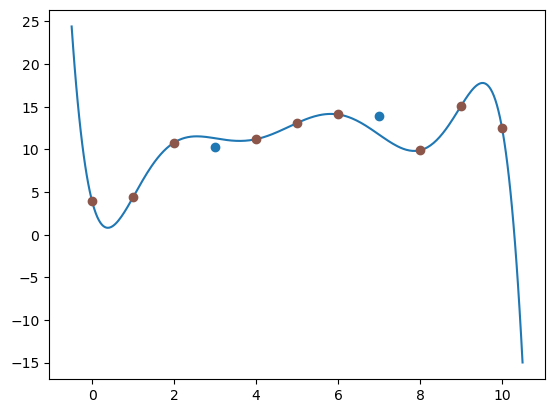

In [9]:
import matplotlib.pyplot as plt
import numpy as np


x_train = np.array([0,1,2,4,5,6,8,9,10])
x_val =  np.array([3,7])

y_train =  np.array([3.9, 4.4, 10.8,  11.2, 13.1, 14.1,  9.9,  15.1, 12.5])
y_val =  np.array([10.3, 13.9])


# Ajustar una curva lineal y estimar sus y-valores y su error.
w = np.polyfit(x_train, y_train, deg=8)
#y_est = w[0]*x **5 + w[1] *x **4 + w[2] *x **3  + w[3] *x **2 + w[4] *x + w[5] 
xx = np.linspace(-0.5,10.5,300)
yy = w[0]*xx **8 + w[1] *xx **7 + w[2] *xx **6  + w[3] *xx **5 + w[4] *xx**4 + w[5] *xx**3 + w[6] *xx**2 +   w[7] *xx +  w[8] 
        
 
fig, ax = plt.subplots()
ax.plot(xx, yy, '-')

ax.plot(x_train, y_train, 'o', color='tab:brown')
ax.plot(x_val, y_val, 'o', color='tab:blue')
plt.show()

Por otro lado, el modelo cuadrático construido previamente tiene $ECM=3.05227$, pero este parece generalizar mejor. 

Esto significa que cuando se tiene más de una máquina de aprendizaje candidata para nuestros datos, no es un criterio suficiente el del error cuadrático medio. Ambas deben generalizar bien. 

De momento puede decidirse por una máquina que tenga un *ECM razonable* para nuestros datos siempre que generalice bien.


Esta revisión permite establecer que el modelo polinomial ajusta sin error los datos de entrenamiento, pero no generaliza bien. En general esto se notará porque el ECM en los datos de validación resulta más grande que en los datos de entrenamiento.

Este fenómeno se conoce como **sobreajuste**. Entonces una máquina de aprendizaje está sobre ajustada, cuando predice muy bien una parte de los datos de entrenamiento (pudiéndose ser a todo el conjunto de entrenamiento), pero generaliza mal, lo cual puede medirse con datos de validación.



### <span style="color:#4CC9F0">Ejercicio</span>

1. Discuta por qué para el ejemplo de las los números de cédulas (entrada) y los número de tarjeta de crédito (salida), siempre es posible construir una máquina de regresión con ECM = 0, pero que nunca puede generalizar bien. Recuerde la clase de modelamiento matemático.

## <span style="color:#4361EE">Regularización</span> 

La tabla de la sección anterior muestra que en el caso del polinomio de grado $M=8$, los coeficientes del polinomio (los pesos que debe aprender la máquina de aprendizaje) son grandes en algunos casos y que la norma (la longitud del vector $\mathbf{w}$ es grande. Por ejemplo, para ese  último caso ($M=8$), la norma del vector $\mathbf{w}$ es:

In [10]:
print('norma del vector w=', np.sqrt(np.sum(w*w)))

norma del vector w= 43.79217575242128


Esta situación no es única de este conjunto de datos. En realidad, es en buena parte la causante del problema de sobreajuste. 

Es posible resolver este problema recurriendo a técnicas de penalización en el proceso de optimización, conocidas como **técnicas de regularización**.

El asunto aquí es bastante sencillo. La idea central es introducir términos adicionales en la función de pérdida que será optimizada. 

Las técnicas de regularización por lo general se basan en restricciones impuestas sobre el vector de pesos $\mathbf{w}$ que evitan que este crezca demasiado. Esas restricciones se introducen usando distintos tipos de norma. Y en ocasiones se incluye más de una. Revisamos aquí las técnicas $L1$ y $L2$.


### <span style="color:#4CC9F0">Regularización L2</span> 

En este caso la restricción se basa en la norma Euclidiana usual. Si  $\mathbf{w}$ es un vector geométrico de $\mathbb{R}^N$, entonces la norma del vector (su tamaño) es definido como:

$$
||\mathbf{w}||^2 = \sum_{i=1}^N w_i^2
$$

La técnica de regularización $L2$ consiste en agregar a la función de pérdida la norma cuadrática multiplicada por una constante que debe ser previamente definida. En símbolos se tiene que:



$$
\mathcal{Loss}(\boldsymbol{w})  = \frac{1}{2} \sum_{n=1}^{N}[f(x_n,\boldsymbol{w}) − y_n]^2 +  \frac{\lambda}{2} ||\boldsymbol{w} ||^2
$$

Se puede verificar que la introducción de la regularización $L2$, reduce el problema de sobreajuste de la máquina de aprendizaje.

Dado que la función de pérdida debe ser minimizada, en función de $\boldsymbol{w}$, el ingreso de la norma en la pérdida no  permite tener valores grandes de la norma del vector.



### <span style="color:#4CC9F0">Ejercicio</span>

Use JAX o Autograd, defina la función de pérdida e introduzca la regularización L2. Use los datos de esta lección. ¿Cuáles valores de $\lambda$ parecen funcionar mejor?

### <span style="color:#4CC9F0">Regularización L1</span>

En este caso la restricción se basa en la norma $\mathcal{l}_1$. Si  $\mathbf{w}$ es un vector geométrico de $\mathbb{R}^N$, entonces la norma $\mathcal{l}_1$ es definida como:

$$
||\mathbf{w}||_1 = \sum_{i=1}^N|w_i|
$$

La técnica de regularización $L1$ consiste en agregar a la función de pérdida la norma $\mathcal{l}_1$ multiplicada por una constante que debe ser concida de antemano. En símbolos se tiene que:

$$
\mathcal{Loss}(\boldsymbol{w})  = \frac{1}{2} \sum_{n=1}^{N}[f(x_n,\boldsymbol{w}) − y_n]^2 + \lambda \sum_{i=1}^N|w_i|
$$

En este caso se controla el tamaño de cada componente de $\boldsymbol{w}$.

### <span style="color:#4CC9F0">Regularización L1-L2</span>

Es posible incluir las dos restriciones en la función de pérdida.  En este caso la función de pérdida queda expresada en la forma:


$$
\mathcal{Loss}(\boldsymbol{w})  = \frac{1}{2} \sum_{n=1}^{N}[f(x_n,\boldsymbol{w}) − y_n]^2 + \lambda_1 \sum_{i=1}^N|w_i| + \frac{\lambda_2}{2} \sum_{i=1}^Nw_i^2.
$$


## <span style="color:#4361EE">Perspectiva probabilística</span>

Vamos a abordar el problema del aprendizaje de máquina desde la perspectiva estadística. Para hacerlo necesitamos introducir los conceptos de distribución conjunta y verosimilitud.

## <span style="color:#4361EE">Distribución conjunta</span>

Supongamos que $X$ y  $Y$ son variables aleatorias con función de densidad conjunta dada por $f_{XY}(x,y)$. El concepto de función de probabilidad conjunta estudiada antes se generaliza para el caso de variables aleatorias continuas.

De momento nos interesa el caso en que $X$ y  $Y$ son variables aleatorias independientes. 

Decimos que las variables aleatorias $X$ y  $Y$  son independientes si su función de densidad conjunta puede escribirse como:

$$
f_{XY}(x,y)= f_X(x)f_Y(y),
$$

en donde $f_X(x)$ y $f_Y(y)$ son las respetivas funciones de densidad de $X$ y  $Y$ y  se dicen que estas son las densidades marginales como antes.

De nuevo esta es una definición bastante técnica y lo que nos interesa de momento es justamente el caso en que las variables aleatorias son independientes. 

Si se tienen $N$ variables independientes $X_1,\cdots,X_N$, cada una con función de densidad $f_n(x_n)$, entonces la función de densidad conjunta de $X_1,\cdots,X_N$ es dada por:

$$
f(x_1,\cdots,x_N) = \prod_{n=1}^N f_n(x_n) = f_1(x_1)\cdot f_2(x_2)\cdots f_N(x_N).
$$


### <span style="color:#4CC9F0">Ejemplo con la distribución normal</span>

Supongamos que se tienen $N$ variables aleatorias normales independientes, cada una con función de densidad dada por $\phi(x;\mu_n,\sigma_n ^2)$, en donde $\phi(x;\mu_n,\sigma_n ^2)$ representa la función de densidad de una distribución normal $\mathcal{N}(\mu_n,\sigma_n ^2)$. Entonces la función de densidad conjunta es dada por:

$$ 
f(x_1,\cdots,x_N|\mu_n,\sigma_n^2, n=1,\cdots,N) = \prod_{n=1}^N \phi(x_n;\mu_n,\sigma_n ^2) = \prod_{n=1}^N \tfrac{1}{\sqrt{2\pi\sigma_n^2}} e^{-\tfrac{(x_n-\mu_n)^2}{2\sigma_n^2}}
$$

Si  las variables son una muestra de una única distribución $\mathcal{N}(\mu,\sigma ^2)$, la conjunta se escribe como:

$$ 
f(x_1,\cdots,x_N|\mu,\sigma^2) = \prod_{n=1}^N \tfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\tfrac{(x_n-\mu)^2}{2\sigma^2}}
$$

## <span style="color:#4361EE">Verosimilitud</span>

El problema recurrente en estadística es que por lo general se tiene la realización de una muestra estadística de alguna distribución que se desconoce.

Por facilidad, vamos a trabajar con la distribución Normal, pero su generalización a otras distribuciones es inmediata.

Supongamos entonces que la muestra proviene teóricamente de una única distribución $\mathcal{N}(\mu,\sigma^2)$. La distribución conjunta de la muestra de arriba. Pero ahora los parámetros $(\mu,\sigma^2)$ se desconocen. Por otro lado al tener la realización de la muestra, las variables toman los valores específicos $x_n$ (justamente los de la realización de la muestra). 


Esto nos lleva a definir una nueva función llamada la *verosimilitud* dada por:

$$ 
l(\mu,\sigma^2|x_1,\cdots,x_N) = \prod_{n=1}^N \tfrac{1}{\sqrt{2\pi\sigma^2}} e^{-\tfrac{(x_n-\mu)^2}{2\sigma^2}}
$$

Observe que hemos intercambiado los roles. Ahora las variables son $(\mu,\sigma^2)$, mientras que $x_1,\cdots,x_N$ son ahora valores conocidos. La función $l(\mu,\sigma^2|x_1,\cdots,x_N)$ ya no es una función de densidad.

El problema estadístico se reduce ahora a encontrar valores para $(\mu,\sigma^2)$ que maximizan a la función $l(\mu,\sigma^2|x_1,\cdots,x_N)$.

Para entender porque tiene sentido maximizar esta función vamos a utilizar el concepto de información.

## <span style="color:#4361EE">Función de pérdida asociada a la log-verosimilitud</span>

Para los valores $x_1,\cdots,x_N$, una función de pérdida es dada por:

$$
\mathcal{Loss}(\mu, \sigma^2) =  - \tfrac{1}{N} \sum_{n=1}^N\log l(x_n;\mu,\sigma^2)
$$

Observe que en este caso la función de pérdida está asociada a la información que transportan los valores observados. Entonces con esta función de pérdida se buscan los parámetros $(\mu, \sigma^2)$ que minimiza la información transportada por los datos y por tanto permite que sean más predecibles por la máquina de aprendizaje.

Se toma el promedio, para poder comparar la función de pérdida usando los datos de entrenamiento con los datos de validación.
 
En este caso, se tiene que esta función de pérdida y la log-verosimiltud están relacionadas de esta forma:

$$
\mathcal{Loss}(\mu, \sigma^2) =  - \tfrac{1}{N} l(\mu,\sigma^2|x_1,\cdots,x_N).
$$

Por lo tanto, un máximo de $l(\mu,\sigma^2|x_1,\cdots,x_N)$ es un mínimo de $\mathcal{Loss}(\mu, \sigma^2)$ y viceversa.



**Notas**
1. Observe además que hemos encontrado una nueva función de pérdida diferente al ECM. Sin embargo, si la distribución asociada en el problema es la Normal, se llega a la misma función de pérdida. Por eso es bastante usual la utilización del ECM como función de pérdida en los problemas de regresión en el área del aprendizaje de máquinas.
2. Puede verificarse que la optimización de $\mu$ y $\sigma$ puede hacerse de forma independiente en el caso Normal. Generalmente, el parámetro $\sigma^2$ no se incluye en los modelos de aprendizaje profundo. Principalmente porque el ECM no depende de ninguna distribución particular.


## <span style="color:#4361EE">Densidad condicional</span> 

Supongamos dos variables aleatorias $X$ y $Y$ con densidad conjunta dada por $f_{XY}(x,y)$. Ya sabemos que si las dos variables son independientes, entonces $f_{XY}(x,y)=f_X(x)f_Y(y)$. 

Por otro lado, en los problemas de regresión se espera justamente que las variables que se busca poner en relación no sean independientes. Entonces la forma de construcción de la máquina de aprendizaje es plantear la densidad de $Y$ condicionada a los valores observados de $X$. 

La densidad condicional de  $Y$ condicionada a valores de $X$ se escribe $f(y|x)$. En la teoría de probabilidad se comprueba que:

$$
f_{XY}(x,y) = f_X(x)f(y|x).
$$

Esta ecuación se usa constantemente para definir $f(y|x)$ como:

$$
f(y|x) = \frac{f_{XY}(x,y)}{f_X(x)}.
$$

Observe que si las variables son independentes, entonces $f(y|x) = f_Y(y)$.

## <span style="color:#4361EE">Regresión y máxima verosimilitud</span>


El objetivo en el problema de ajuste de curvas es poder **hacer predicciones** para la
variable objetivo $ t$ dado algún nuevo valor de la variable de entrada $ x $ sobre la base de un conjunto de datos de entrenamiento que comprenden $ N $ valores de entrada $ \mathbf{x} = (x_1, \cdots, x_N) ^ T $ y sus correspondientes valores objetivo $ \mathbf{t} = (t_1, \cdots, t_N) ^ T $. 

Podemos expresar la incertidumbre sobre el valor de la variable objetivo utilizando una distribución de probabilidad. Para este propósito, asumiremos que, dado el valor de $ x $, el valor correspondiente de $ t $ tiene una distribución Gaussiana (Normal) con una media igual al valor $ y (x, \boldsymbol{w}) $ de la curva polinomial. Así tenemos:

$$ 
p(t|x,\boldsymbol{w}, \beta) = \mathcal{N} (t|y(x,\boldsymbol{w}), \beta^{-1}),
$$

en donde  $\beta$ es el parámetro de precisión (inverso del parámetro de escala). La gráfica ilustra la situación.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Matematicas/Imagenes/regression_curve.png" width="500" height="300" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Ejemplo de una curva de regresión: y(x) = E[ t | x ] </p>
</figcaption>
</figure>

Ahora usamos los datos de entrenamiento $\{\boldsymbol {x, t} \}$ para determinar los valores desconocidos de los parámetros $ \boldsymbol{w} $ y $\beta $ utilizando la máxima verosimilitud (el valor que maximiza la verosimilitud). 

Si se supone que las parejas  $(x_n,t_n)$ se observan  independientemente, entonces la función de verosimilitud viene dada por:

$$
p(t|\boldsymbol{x, t}, \beta) = \prod_{n=1}^{N} \mathcal{N}(t_n|y(x_n,\boldsymbol{w}), \beta^{-1})
$$

El logaritmo de la verosimilitud es dado por:

$$ \ln p(t|\boldsymbol{x, t}, \beta) = -\frac{\beta}{2}\sum_{n=1}^{N}[y(x_n,\boldsymbol{w})-t_n]^2 + \frac{N}{2} \ln \beta   - \frac{N}{2} \ln (2 \pi)$$


Supongamos que $\boldsymbol{\phi}(x)$ define un vector con elementos $\boldsymbol{\phi}_i(x) = x_i$, para $i=1,\cdots,M$.

Sea $\boldsymbol{\phi}(X)$ la matriz cuyas filas están dadas por $(1,\boldsymbol{\phi}(x_n)^T)$, para $n=1,\cdots,N$.  Las estimaciones de máxima verosimilutud (EMV) estan dadas por:

$$
\begin{align*}
\boldsymbol{w}_{ml} &= [\boldsymbol{\phi}(X)^T\boldsymbol{\phi}(X)]^{-1}\boldsymbol{\phi}(X)^T\boldsymbol{t},\\
\beta^{-1}_{ml} &=\frac{1}{N} \sum_{n=1}^{N}[y(x_n,\boldsymbol{w}_{ml})-t_n]^2.
\end{align*}
$$

Además se verifica que:

$$
\begin{align*}
E(\boldsymbol{w}_{ml}) &= \boldsymbol{w}\\
E(\beta^{-1}_{ml}) &= \left(\tfrac{N-1}{N}\right)\beta^{-1}.
\end{align*}
$$

## <span style="color:#4361EE">Distribución predictiva</span>


Después de obtener las estimaciones de máxima verosimilitud (EMV), tenemos una distribución predictiva que corresponde a la distribución de probabilidad condicional $p(t|x,\widehat{\boldsymbol{w}},\widehat{\beta}^{-1})$ dado, la cual se obtiene tomando como parámetros la EMV de parámetros de probabilidad para obtener en este caso:

$$ 
p(t|\widehat{\boldsymbol{w}},\widehat{\beta}) = \mathcal{N}(t|y(x,\widehat{\boldsymbol{w}}),\widehat{\beta}^{-1})
$$

La siguiente gráfica ilustra la distribución predictiva en nuestro ejemplo inicial.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Matematicas/Imagenes/predictive_2.png" width="400" height="300" align="center"/>

Distribución predictiva: $p(t|\widehat{\boldsymbol{w}},\widehat{\beta}) = \mathcal{N}(t|y(x,\widehat{\boldsymbol{w}}),\widehat{\beta}^{-1})$ </p>


<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="right"/> 
</figure>